#Importing libraries and reading data 

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load files 
df_train = pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')
df_sample=pd.read_csv('SampleSubmission.csv')
df_variable=pd.read_csv('VariableDefinitions.csv')


In [ ]:
df_train.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,1,1,2,1,1,2,2,2,1,2,NaN,NaN,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [ ]:
df_train.shape

(104867, 36)

In [ ]:
df_test.shape 

(44943, 35)

In [ ]:
df_train.shape

(104867, 36)

In [ ]:
df_variable

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


## checking for missing values 


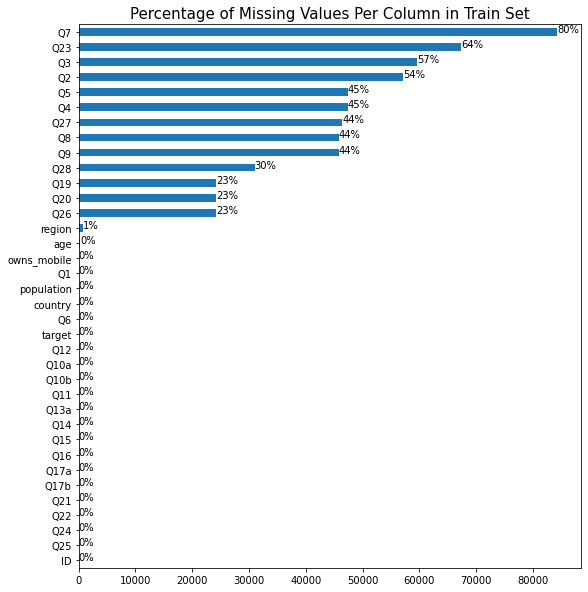

In [ ]:
# Check if there any missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

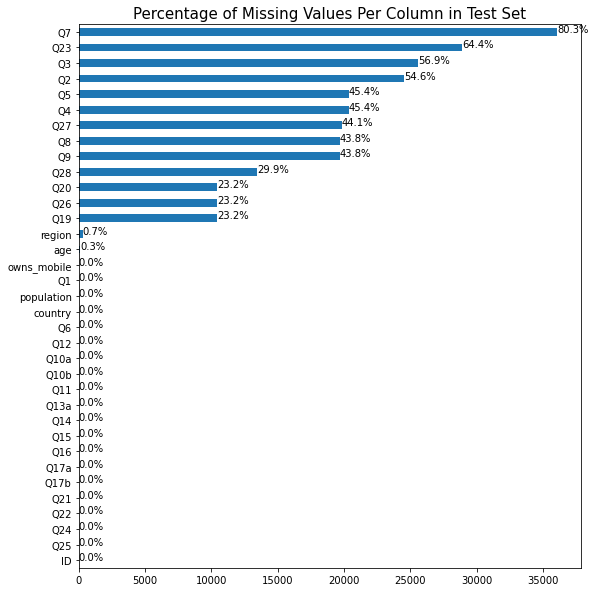

In [ ]:
# Check if there missing values in test set
ax = df_test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/df_test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
ls=[df_train,df_test]
dataset=pd.concat(ls)


In [ ]:
dataset.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0.0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1.0
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0.0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,1,1,2,1,1,2,2,2,1,2,NaN,NaN,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1.0
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1.0


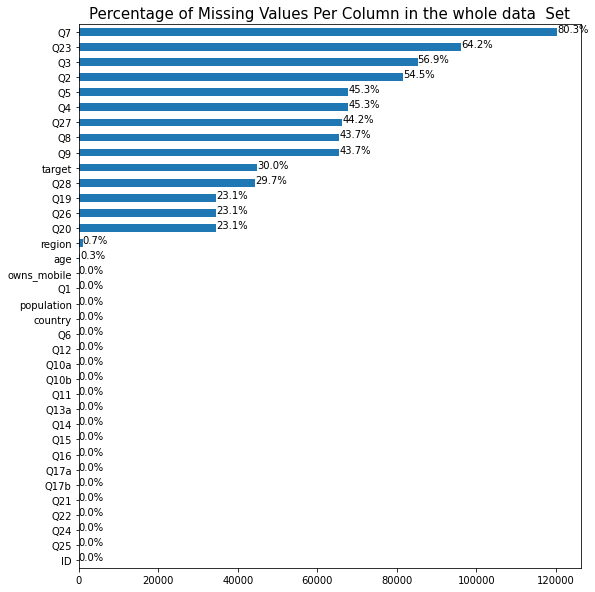

In [ ]:
# Check if there missing values in test set
ax = dataset.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in the whole data  Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/dataset.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
#chech for duplicates
dataset.duplicated().any()

False

In [ ]:
df_train=df_train.drop(['Q7','Q23','Q3'],axis=1)
df_test=df_test.drop(['Q7','Q23','Q3'],axis=1)
ls=[df_train,df_test]

In [ ]:
df_train.isnull().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2             57146
Q4             47422
Q5             47422
Q6                 0
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

# distribution of the target variable 


Text(0.5, 1.0, 'Target variable distribution')

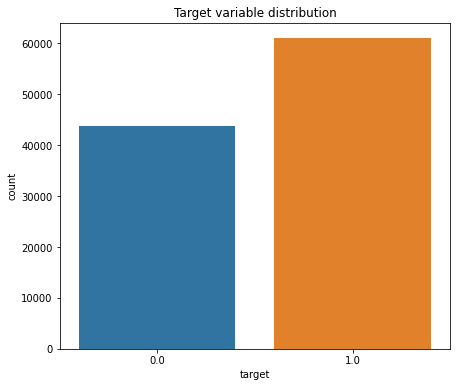

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(dataset.target)
plt.title('Target variable distribution')

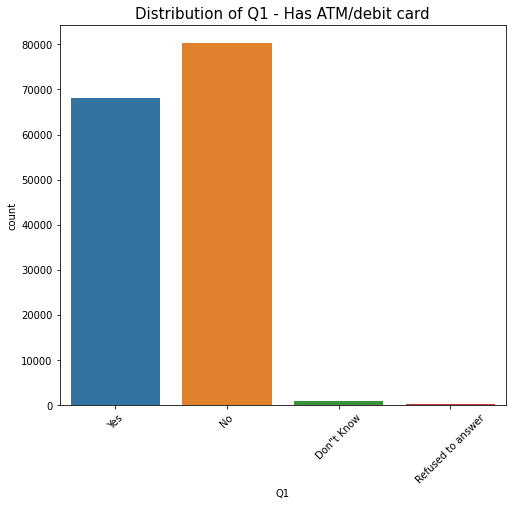

In [ ]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(dataset.Q1)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q1 - Has ATM/debit card', fontdict = {'size': 15});

In [ ]:
df_train.isnull().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2             57146
Q4             47422
Q5             47422
Q6                 0
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

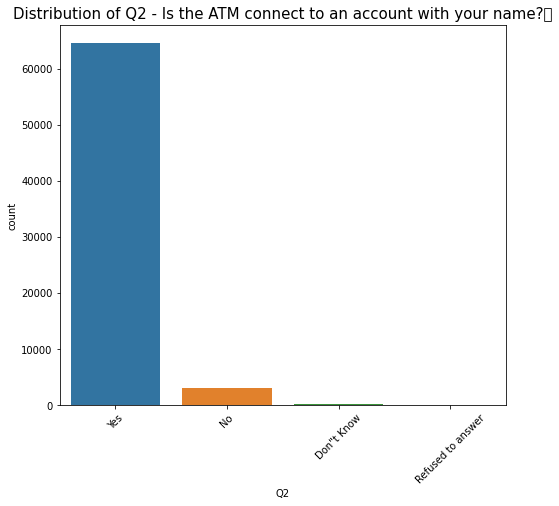

In [ ]:
# Q2 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(dataset.Q2)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q2 - Is the ATM connect to an account with your name?	', fontdict = {'size': 15});

In [ ]:
median = df_train["Q2"].median()
df_train["Q2"].fillna(median, inplace=True)
df_test["Q2"].fillna(median, inplace=True)

In [ ]:
df_train.isnull().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2                 0
Q4             47422
Q5             47422
Q6                 0
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

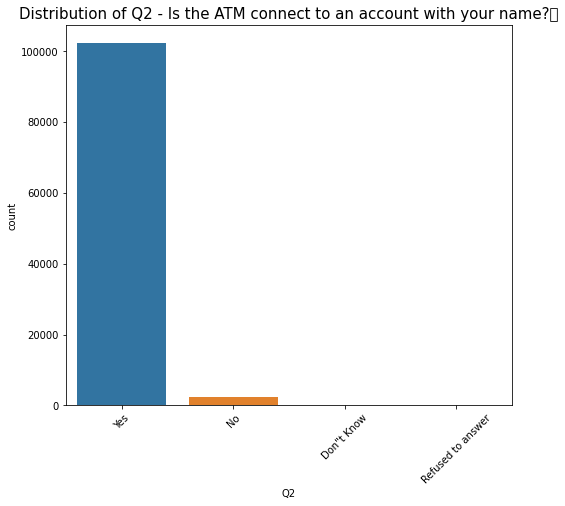

In [ ]:
# Q2 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(df_train.Q2)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q2 - Is the ATM connect to an account with your name?	', fontdict = {'size': 15});

In [ ]:
df_variable

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


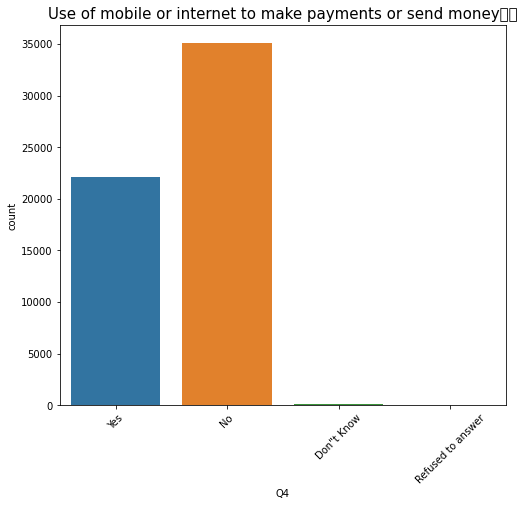

In [ ]:
# Q4 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(df_train.Q4)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Use of mobile or internet to make payments or send money		', fontdict = {'size': 15});

In [ ]:
mean = df_train["Q2"].mean()
df_train["Q4"].fillna(mean, inplace=True)
df_test["Q4"].fillna(median, inplace=True)

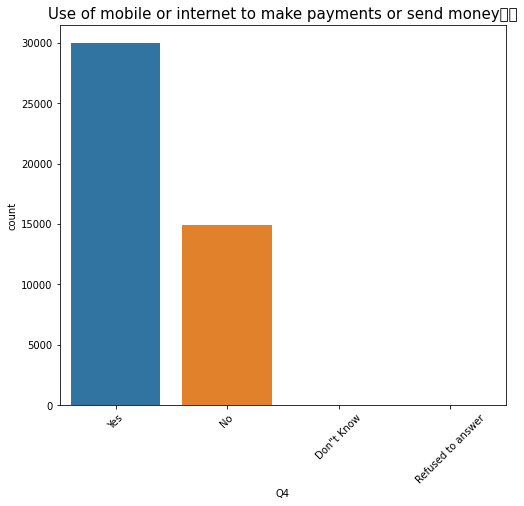

In [ ]:
# Q4 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(df_test.Q4)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Use of mobile or internet to make payments or send money		', fontdict = {'size': 15});

In [ ]:
# deleting Q5 becuse it is correlated to Q 4 so we can get rid of it 
df_train=df_train.drop(['Q5'],axis=1)
df_test=df_test.drop(['Q5'],axis=1)
ls=[df_train,df_test]


In [ ]:
df_train.isnull().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2                 0
Q4                 0
Q6                 0
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

In [ ]:
dataset.shape

(149810, 36)

In [ ]:
# Category columns
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in dataset.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
dataset[cat_cols] = dataset[cat_cols].astype('category')

# Confirm whether the changes have been successful
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149810 entries, 0 to 44942
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q2           68137 non-null   category
 7   Q3           64562 non-null   category
 8   Q4           82004 non-null   category
 9   Q5           82004 non-null   category
 10  Q6           149810 non-null  category
 11  Q7           29515 non-null   category
 12  Q8           84272 non-null   category
 13  Q9           84272 non-null   category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a 

### Number of unique values per categorical column


In [ ]:
# Check unique values for each categorical column
for i in cat_cols:
  print(i, dataset[i].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q2 4
Q3 4
Q4 4
Q5 4
Q6 4
Q7 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q23 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


# Manipulating the missing value 

In [ ]:
# deleteing the missing value with the higher percentage 
dataset.drop('Q7',axis=1,inplace=True)



In [ ]:
dataset.sample(2)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
102322,ID_9753869751,Morocco,Middle East & North Africa (excluding high income),25550170.0,18.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,1,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2.0,2,2,2.0,NaN,1.0,1.0,1.0
72768,ID_6952548453,Madagascar,Sub-Saharan Africa (excluding high income),14614740.0,29.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,1,2,2,2,2,2,2,2,1.0,1.0,2,1,2.0,2,2,1.0,NaN,1.0,1.0,0.0


In [ ]:
dataset.isnull().sum()

ID                 0
country            0
region           980
population         0
age              411
Q1                 0
Q2             81673
Q3             85248
Q4             67806
Q5             67806
Q6                 0
Q8             65538
Q9             65538
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            34604
Q20            34604
Q21                0
Q22                0
Q23            96230
Q24                0
Q25                0
Q26            34604
Q27            66275
owns_mobile        2
Q28            44438
target         44943
dtype: int64

In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in dataset.columns:
  if col in cat_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
  elif col in num_cols:
    dataset[col] = dataset[col].fillna(dataset[col].fillna(9999))



In [ ]:
dataset.sample()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
16384,ID_3655514630,"Taiwan, China",Sub-Saharan Africa (excluding high income),20319476.0,22.0,2,1.0,1.0,1.0,2.0,2,1.0,1.0,2,1,2,1,2,2,2,2,2,2,2.0,2.0,2,2,2.0,2,2,2.0,2.0,1.0,1.0,NaN


In [ ]:
dataset[dataset.columns.difference(['target'])].isna().sum().any()

False

In [ ]:
dataset.isna().sum().sum()

44943

In [ ]:
dataset.shape

(149810, 35)

In [ ]:
dataset.sample(7)

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
95887,ID_9149789495,Mali,Sub-Saharan Africa (excluding high income),9386639.0,15.0,2,1.0,1.0,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2,2,2.0,2,2,2.0,2.0,1.0,1.0,0.0
66824,ID_6377014762,Lesotho,Sub-Saharan Africa (excluding high income),1420766.0,33.0,2,1.0,1.0,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,1,2,2,2,2.0,2.0,2,2,2.0,2,2,2.0,2.0,2.0,1.0,1.0
22969,ID_5120768520,"Venezuela, RB",Latin America & Caribbean (excluding high income),22762362.0,26.0,2,1.0,1.0,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,2.0,2,2,2.0,2.0,2.0,1.0,NaN
100548,ID_9585919373,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,2,1.0,1.0,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,1,2,2,1,2.0,1.0,2,2,2.0,2,2,2.0,2.0,1.0,1.0,0.0
98655,ID_9409569601,Turkey,Europe & Central Asia (excluding high income),59394160.0,23.0,1,1.0,1.0,1.0,1.0,1,1.0,1.0,1,2,2,2,2,2,2,2,2,2,1.0,2.0,1,2,2.0,1,2,2.0,2.0,1.0,1.0,1.0
96911,ID_9241921961,Germany,High income: OECD,71846928.0,28.0,1,1.0,1.0,1.0,1.0,2,1.0,1.0,2,1,2,2,1,2,2,2,2,2,2.0,2.0,2,1,2.0,2,2,2.0,2.0,1.0,1.0,1.0
5130,ID_1128602877,Bangladesh,South Asia,115857168.0,22.0,2,1.0,1.0,2.0,2.0,2,1.0,1.0,2,2,2,2,2,1,2,2,2,2,2.0,2.0,2,2,2.0,2,2,1.0,2.0,1.0,1.0,NaN


#feature engineering 

In [ ]:
dataset.shape

(149810, 35)

In [ ]:
#encode categorical features 
cat_colss = ['country',	'region', 'owns_mobile'] + [x for x in dataset.columns if x.startswith('Q')]
dataset=pd.get_dummies(data=dataset,columns=cat_colss)
dataset.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,"country_Congo, Dem. Rep.","country_Congo, Rep.",country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominican Republic,...,Q19_1.0,Q19_2.0,Q19_3.0,Q19_4.0,Q20_1.0,Q20_2.0,Q20_3.0,Q20_4.0,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1.0,Q23_2.0,Q23_3.0,Q23_4.0,Q24_1,Q24_2,Q24_3,Q24_4,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1.0,Q26_2.0,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,25550170.0,66.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
dataset.sample(4)

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,"country_Congo, Dem. Rep.","country_Congo, Rep.",country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominican Republic,...,Q19_1.0,Q19_2.0,Q19_3.0,Q19_4.0,Q20_1.0,Q20_2.0,Q20_3.0,Q20_4.0,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1.0,Q23_2.0,Q23_3.0,Q23_4.0,Q24_1,Q24_2,Q24_3,Q24_4,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1.0,Q26_2.0,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
39456,ID_3778413856,950815296.0,45.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
25001,ID_2396165194,6161980.0,18.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
60202,ID_5756970068,25550170.0,28.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6837,ID_0652706563,38409136.0,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
dataset.shape

(149810, 272)

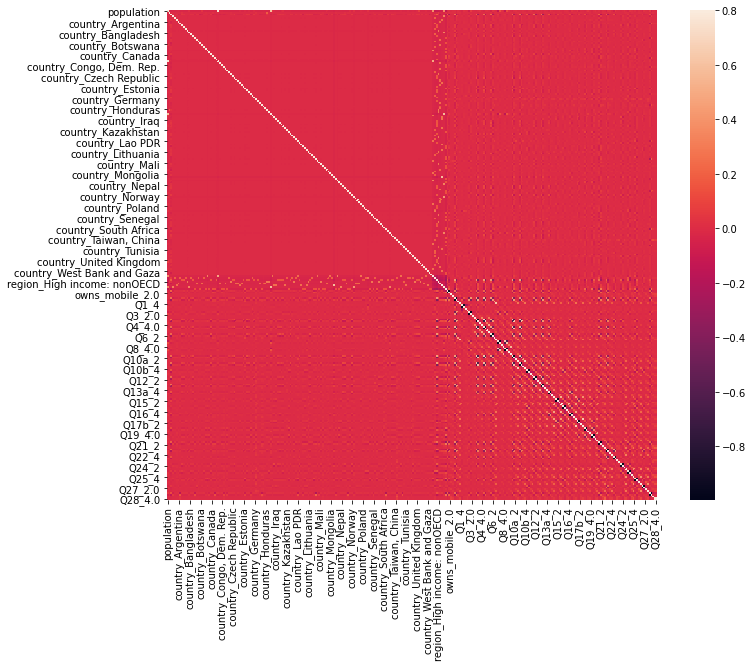

In [ ]:
#correlation matrix
corrmat = dataset.corr() # effectuer le comatrice de correlation 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# MAchine learning 

In [ ]:
# select x and y 
main_colss = dataset.columns.difference(['ID','target'])
features=dataset[main_colss]



In [ ]:
# dealing with the missing data in labels 
dataset.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,"country_Congo, Dem. Rep.","country_Congo, Rep.",country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominican Republic,...,Q19_1.0,Q19_2.0,Q19_3.0,Q19_4.0,Q20_1.0,Q20_2.0,Q20_3.0,Q20_4.0,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1.0,Q23_2.0,Q23_3.0,Q23_4.0,Q24_1,Q24_2,Q24_3,Q24_4,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1.0,Q26_2.0,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,25550170.0,66.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
dataset['target'] = dataset['target'].fillna(0)


In [ ]:
dataset.isnull().sum()

ID                     0
population             0
age                    0
target                 0
country_Afghanistan    0
                      ..
Q27_4.0                0
Q28_1.0                0
Q28_2.0                0
Q28_3.0                0
Q28_4.0                0
Length: 272, dtype: int64

In [ ]:
labels=dataset['target']

In [ ]:
labels

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
44938    0.0
44939    0.0
44940    0.0
44941    0.0
44942    0.0
Name: target, Length: 149810, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=10)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
predictions_tree = tree.predict(X_test)
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65     17854
         1.0       0.49      0.48      0.48     12108

    accuracy                           0.59     29962
   macro avg       0.57      0.57      0.57     29962
weighted avg       0.58      0.59      0.59     29962



In [ ]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]
# Check the auc score of the model
print(f'RandomForest AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

RandomForest AUC score on the X_test is: 0.6545012843965197

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69     17854
         1.0       0.54      0.50      0.52     12108

    accuracy                           0.62     29962
   macro avg       0.61      0.60      0.60     29962
weighted avg       0.62      0.62      0.62     29962



In [ ]:
# Importation des modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Instantiation des modèles
#svm = SVC()
knn = KNeighborsClassifier()
log = LogisticRegression()

In [ ]:
# Train
log.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

predictions_log = log.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_log))


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     17854
         1.0       0.00      0.00      0.00     12108

    accuracy                           0.60     29962
   macro avg       0.30      0.50      0.37     29962
weighted avg       0.36      0.60      0.44     29962



In [ ]:
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_test)
print(classification_report(y_test, prediction_knn))


              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70     17854
         1.0       0.53      0.45      0.49     12108

    accuracy                           0.62     29962
   macro avg       0.60      0.59      0.59     29962
weighted avg       0.61      0.62      0.61     29962



In [ ]:
#svm.fit(X_train,y_train)
#prediction_svm=knn.predict(X_test)
#print(classification_report(y_test, prediction_svm))


In [ ]:
#a7sen wa7ed random forest wela knnn 